# Counterfactual scenarios

A SIMPLE EMISSIONS DECOMPOSITION MODEL OF COUNTERFACTUAL EMISSIONS PATHWAYS from the article "Slameršak, A., Kallis, G., O'Neill, D.W., and Hickel, J. (2022). From low-growth to post-growth scenarios of climate mitigation. 2022".


In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [2]:
# What if we deviated from the historical trajectory of exponentially growting emissions? How much easier would be to stabilize global warming?
year1 = np.arange(1990, 2021+1, 1)  

In [3]:
#-----IMPORT DATA-----
df = pd.read_excel('data/counterfactual_scenarios_data.xlsx', 'Historical data')
df.head()

,Year,CO2 Emissions (GtCO2),Final Energy (EJ),GDP ($),Population,Low carbon penetration (%),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1990,22.734076,248.314377,3.790766e+13,5.280046e+09,19.275393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,23.207834,251.506410,3.847949e+13,5.368139e+09,19.572754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,22.482779,251.002503,3.916324e+13,5.452576e+09,19.907095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,22.732886,253.011096,3.974770e+13,5.537886e+09,19.979482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,22.894472,254.838148,4.091898e+13,5.622086e+09,20.134470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#-----HISTORICAL DATA-----
CO2_emissions = df['CO2 Emissions (GtCO2)'].to_numpy() # Global CO2 emissions from antropogenic activities [GtCO2]
Final_energy = df['Final Energy (EJ)'].to_numpy() * 10**9 # Final energy consumption [GJ]
GDP = df['GDP ($)'].to_numpy() #  Gross Domestic Product [$]
Population = df['Population '].to_numpy() #  Population [Number of people]
Low_carbon_penetration = df['Low carbon penetration (%)'].to_numpy() #  Share of Low-carbon energy in Final energy consumption [from 0% to 100%]

In [5]:
#-----DEFINING OF EMISSION FACTORS-----
Energy_intensity = Final_energy/GDP  # Energy intensity of Gross Domestic Product [GJ/$]
Carbon_intensity_FF = CO2_emissions * 10**9 / (Final_energy * (1 - 0.01 * Low_carbon_penetration))  # Carbon intensity of energy [tCO2/GJ]
GDP_per_capita = GDP / Population # Global Gross Domestic Product per capita [$/capita]
Low_carbon_energy = Final_energy * Low_carbon_penetration * 0.01  # Final energy consumption from low-carbon sources (renewables & nuclear) [GJ]
FF_energy = Final_energy - Low_carbon_penetration  # Final energy consumption from fossil fuel sources [GJ]
Carbon_intensity_tot = CO2_emissions / Final_energy

In [6]:
#-----HISTORICAL AVERAGE CHANGES from 1990 to 2021-----
Avg_Energy_intensity_improvement = 100*((Energy_intensity[-1]/Energy_intensity[0])**(1/31)-1)  # Change in Energy intensity
Avg_Carbon_intensity_FF_improvement = 100*((Carbon_intensity_FF[-1]/Carbon_intensity_FF[0])**(1/31)-1)  # Change in Carbon intensity of fossil fuel sources (Carbon intensity can change due to fuel switching, for example from coal to natural gas
Avg_GDP_per_capita_growth = 100*((GDP_per_capita[-1]/GDP_per_capita[0])**(1/31)-1)  # Growth in GDP per capita
Avg_low_carbon_growth = 100*((Low_carbon_energy[-1]/Low_carbon_energy[0])**(1/31)-1)  # Growth in Low carbon energy
Population_growth = 100*((Population[-1]/Population[0])**(1/31)-1)  # Population growth

In [7]:
#----COUNTERFACTURAL ASSUMPTIONS-----
Multiplicator_Energy_intensity = 1.75  # [0 - no change, 1 - historical value, 2 - twice as fast (ambitious), 3 - very ambitiou, >3 (difficult to achieve)] - > By how much (faster/slower) was energy intensity to change compared to the historical value of 1.06% per year
counterfactual_intensity_improvement = Multiplicator_Energy_intensity*Avg_Energy_intensity_improvement

Multiplicator_Carbon_intensity = 1.75  # [-1 - transition to a coal-powered world,  0 - no change, 1 - historical value, 5 - switching from coal to gas (ambitious)] - > By how much (faster/slower) was carbon intensity of fossil fuels to change compared to the historical value of 0.06% per year
counterfactual_carbon_intensity_FF_improvement = Multiplicator_Carbon_intensity*Avg_Carbon_intensity_FF_improvement

Multiplicator_GDP_per_capita = 1  # [-1 -> deep degrowth scenario, -0.5 -> slow degrowth, 0 -> steady-state economy, 0.5 -> secular stagnation, 1 - historical value, 2 - fast GDP growth] - > By how much (faster/slower) was GDP per capita to change compared to the historical value of 1.41% per year
counterfactual_GDP_per_capita_growth = Multiplicator_GDP_per_capita*Avg_GDP_per_capita_growth

Multiplicator_low_carbon = 2  # [1 - historical value (slow deployment of renewables), 1.5 -> 50% faster deployment (moderately ambitiou), 2-> 100% faster deployment (very ambitious)] - > By how much (faster/slower) was growth of low-carbon energy compared to the historical value of 1.93% per year
counterfactual_low_carbon_growth = Multiplicator_low_carbon*Avg_low_carbon_growth

Multiplicator_population = 1  # [0.5 -> Empty planet scenario, 1 - historical value, 1.5 -> 50% faster population growth] - > By how much (faster/slower) was population growth compared to the historical value of 1.28% per year
counterfactual_population_growth = Multiplicator_population*Population_growth

In [8]:
#-----START OF THE COUTNERFACTURAL SCENARIO-----
first_year = 1990  # begining of the time series
start_year = 1991  # What year we deviate from the historical trajectory?
start = start_year - first_year

In [9]:
#-----EMISSIONS FACTORS IN COUNTERFACTURAL SCENARIOS-----
counterfactual_CO2_emissions = np.zeros(32)
counterfactual_Energy_intensity = np.zeros(32)
counterfactual_Low_carbon_penetration = np.zeros(32)
counterfactual_Low_carbon_energy = np.zeros(32)
counterfactual_Final_energy = np.zeros(32)
counterfactual_FF_energy = np.zeros(32)
counterfactual_Carbon_intensity_FF = np.zeros(32)
counterfactual_GDP_per_capita = np.zeros(32)
counterfactual_Population = np.zeros(32)

In [10]:
#-----COUNTERFACTUAL SCENARIOS ARE THE SAME AS HISTORICAL SCENARIO BEFORE THE START YEAR-----
counterfactual_Energy_intensity[0:start] = Energy_intensity[0:start]
counterfactual_Final_energy[0:start] = Final_energy[0:start]
counterfactual_Low_carbon_energy[0:start] = Low_carbon_energy[0:start]
counterfactual_FF_energy[0:start] = FF_energy[0:start]
counterfactual_Low_carbon_penetration[0:start] = counterfactual_Low_carbon_energy[0:start] / counterfactual_Final_energy[0:start]
counterfactual_Carbon_intensity_FF[0:start] = Carbon_intensity_FF[0:start]
counterfactual_CO2_emissions[0:start] = CO2_emissions[0:start]
counterfactual_GDP_per_capita[0:start] = GDP_per_capita[0:start]
counterfactual_Population[0:start] = Population[0:start]

In [11]:
#-----IPAT EQUATION FOR THE MODELLING OF COUNTERFACTUAL SCENARIOS-----
for j in np.arange(start-1, 31, 1):

    if Multiplicator_Energy_intensity == 1:
        counterfactual_Energy_intensity[j+1] = Energy_intensity[j+1] 
    else:
        counterfactual_Energy_intensity[j+1] = counterfactual_Energy_intensity[j]*(1 + 0.01*counterfactual_intensity_improvement);

    if Multiplicator_low_carbon == 1:
        counterfactual_Low_carbon_energy[j+1] = Low_carbon_energy[j+1] 
    else:
        counterfactual_Low_carbon_energy[j+1]  = counterfactual_Low_carbon_energy[j]*(1 + 0.01*counterfactual_low_carbon_growth);  

    if Multiplicator_GDP_per_capita == 1:
        counterfactual_GDP_per_capita[j+1]  = GDP_per_capita[j+1] 
    else:
        counterfactual_GDP_per_capita[j+1] = counterfactual_GDP_per_capita[j]*(1 + 0.01*counterfactual_GDP_per_capita_growth);

    if Multiplicator_population == 1:
        counterfactual_Population[j+1] = Population[j+1] 
    else:
        counterfactual_Population[j+1] = counterfactual_Population[j]*(1 + 0.01*counterfactual_population_growth);  

    if Multiplicator_Carbon_intensity == 1:
        counterfactual_Carbon_intensity_FF[j+1] = Carbon_intensity_FF[j+1] 
    else:
        counterfactual_Carbon_intensity_FF[j+1] = counterfactual_Carbon_intensity_FF[j]*(1 + 0.01*counterfactual_carbon_intensity_FF_improvement)
    
    counterfactual_Final_energy[j+1] = counterfactual_Energy_intensity[j+1]*counterfactual_GDP_per_capita[j+1]*counterfactual_Population[j+1]
    counterfactual_FF_energy[j+1] = counterfactual_Final_energy[j+1] - counterfactual_Low_carbon_energy[j+1]
    counterfactual_Low_carbon_penetration[j+1] = counterfactual_Low_carbon_energy[j+1]/counterfactual_Final_energy[j+1]
    counterfactual_CO2_emissions[j+1] = (counterfactual_Energy_intensity[j+1]
        *(1 - counterfactual_Low_carbon_penetration[j+1])*counterfactual_Carbon_intensity_FF[j+1]
        *counterfactual_GDP_per_capita[j+1]*counterfactual_Population[j+1]*10**(-9))

In [12]:
#-----DECOMPOSITION FACTORS IN THE COUNTERFACTUAL SCENARIOS------
Carbon_intensity_counterfactual_tot = counterfactual_CO2_emissions/counterfactual_Final_energy;
GDP_counterfactual = counterfactual_GDP_per_capita*counterfactual_Population;
Energy_intensity_counterfactual = counterfactual_Final_energy/GDP_counterfactual;

In [13]:
#-----ANNUAL GROWTH RATES-----
Growth_GDP_historical = 100*(GDP_per_capita[1:]/GDP_per_capita[:-1] - 1)
Growth_Energy_historical = 100*(Final_energy[1:]/Final_energy[:-1] - 1)
Growth_CO2_historical = 100*(CO2_emissions[1:]/CO2_emissions[:-1] - 1)

Growth_GDP_counterfactual = 100*(counterfactual_GDP_per_capita[1:]/counterfactual_GDP_per_capita[:-1] - 1)
Growth_Energy_counterfactual = 100*(counterfactual_Final_energy[1:]/counterfactual_Final_energy[:-1] - 1)
Growth_CO2_counterfactual = 100*(counterfactual_CO2_emissions[1:]/counterfactual_CO2_emissions[:-1] - 1)

In [51]:
#-----DIFFERENCE IN TOTAL ANTROPOGENIC EMISSIONS BETWEEN REAL HISTORY AND THE COUNTERFACTUAL SCENARIO-----
Diff_counterfactual = np.sum((CO2_emissions[start-1:] - counterfactual_CO2_emissions[start-1:]))

#-----1.5 DEGREE COMPATIBLE PATHWAY FROM 2021 UNDER THE HISTORICAL SCENARIO-----
Emissions_15 = [CO2_emissions[31], 1/2*CO2_emissions[31], 1/4*CO2_emissions[31], 1/8*CO2_emissions[31]]  # we need to halve carbon emissions every decade
Emissions_15_interp = CubicSpline([2021, 2030, 2040, 2050], Emissions_15)(np.arange(2021, 2051, 1))

In [52]:
#-----FINDING THE 1.5 DEGREE COMPATIBLE PATHWAY FROM 2021 UNDER THE COUNTERFACTUAL SCENARIO-----
r = np.arange(-0.15, 0.01, 0.001)  
aux = np.zeros(160);

for t in np.arange(0, 160, 1):
    aux[t] = sum(counterfactual_CO2_emissions[31]*(1+r[t])**np.arange(1, 60, 1)) - np.sum(Emissions_15_interp) - Diff_counterfactual

minVal = np.min(np.abs(aux))
i = np.where(np.abs(aux) == minVal)[0][0]

counterfactual_Emissions_15 = counterfactual_CO2_emissions[31]*(1+r[i])**np.arange(0, 60, 1)

In [55]:
year2 = np.arange(2021, 2051, 1)

Text(0.5, 1.0, 'CO2 Emissions Scenarios')

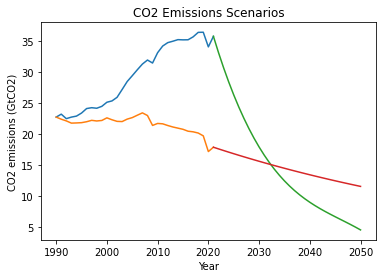

In [60]:
plt.plot(year1, CO2_emissions, label='Historical Emissions')
plt.plot(year1, counterfactual_CO2_emissions, label='Counterfactual scenario')
plt.plot(year2, Emissions_15_interp, label='1.5-Degree Pathway')
plt.plot(year2, counterfactual_Emissions_15[0:30]);
plt.xlabel('Year')
plt.ylabel('CO2 emissions (GtCO2)')
plt.title('CO2 Emissions Scenarios');

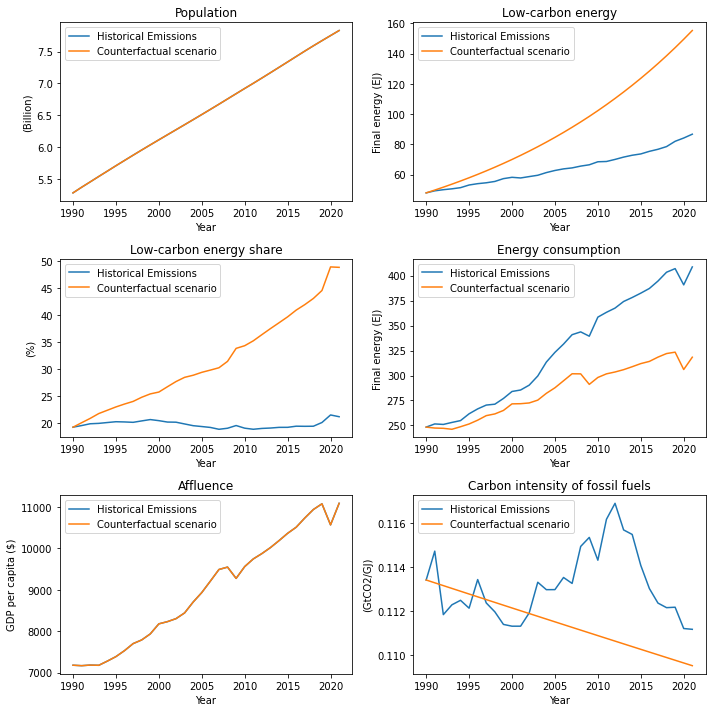

In [76]:
#-----EMISSIONS FACTORS AND AUXILIARY VARIABLES-----

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = [item for sublist in axs for item in sublist]

plot_vars = [
    (Population / 10**9, counterfactual_Population / 10**9, '(Billion)', 'Population'),
    (Low_carbon_energy/ 10**9, counterfactual_Low_carbon_energy/ 10**9, 'Final energy (EJ)', 'Low-carbon energy'),
    (Low_carbon_penetration, 100*counterfactual_Low_carbon_penetration, '(%)', 'Low-carbon energy share'),
    (Final_energy/10**9, counterfactual_Final_energy/10**9, 'Final energy (EJ)', 'Energy consumption'),
    (GDP_per_capita, counterfactual_GDP_per_capita, 'GDP per capita ($)', 'Affluence'),
    (Carbon_intensity_FF, counterfactual_Carbon_intensity_FF, '(GtCO2/GJ)', 'Carbon intensity of fossil fuels'),
]

for ax, (x1, x2, label, title) in zip(axs, plot_vars):

    ax.plot(year1, x1, label='Historical Emissions')
    ax.plot(year1, x2, label='Counterfactual scenario')
    ax.legend()
    ax.set_title(title);
    ax.set_ylabel(label);
    ax.set_xlabel('Year');

plt.tight_layout()

In [ ]:
#-----DECOUPLING ANALYSIS-----
#-----Annual growth rates-----
Growth_GDP_historical = 100*(GDP_per_capita[1:]/GDP_per_capita[:-1] - 1)
Growth_Energy_historical = 100*(Final_energy[1:]/Final_energy[:-1] - 1)
Growth_CO2_historical = 100*(CO2_emissions[1:]/CO2_emissions[:-1] - 1)

Growth_GDP_counterfactual = 100*(counterfactual_GDP_per_capita[1:]/counterfactual_GDP_per_capita[:-1] - 1)
Growth_Energy_counterfactual = 100*(counterfactual_Final_energy[1:]/counterfactual_Final_energy[:-1] - 1)
Growth_CO2_counterfactual = 100*(counterfactual_CO2_emissions[1:]/counterfactual_CO2_emissions[:-1] - 1)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = [item for sublist in axs for item in sublist]

plot_vars = [
    (Population / 10**9, counterfactual_Population / 10**9, '(Billion)', 'Population'),
    (Low_carbon_energy/ 10**9, counterfactual_Low_carbon_energy/ 10**9, 'Final energy (EJ)', 'Low-carbon energy'),
    (Low_carbon_penetration, 100*counterfactual_Low_carbon_penetration, '(%)', 'Low-carbon energy share'),
    (Final_energy/10**9, counterfactual_Final_energy/10**9, 'Final energy (EJ)', 'Energy consumption'),
    (GDP_per_capita, counterfactual_GDP_per_capita, 'GDP per capita ($)', 'Affluence'),
    (Carbon_intensity_FF, counterfactual_Carbon_intensity_FF, '(GtCO2/GJ)', 'Carbon intensity of fossil fuels'),
]

for ax, (x1, x2, label, title) in zip(axs, plot_vars):

    ax.plot(year1, x1, label='Historical Emissions')
    ax.plot(year1, x2, label='Counterfactual scenario')
    ax.legend()
    ax.set_title(title);
    ax.set_ylabel(label);
    ax.set_xlabel('Year');

plt.tight_layout()

Growth_GDP_historical,

#-----Decoupling plots-----
fig_temp = figure('visible','on');
subplot(2,2,1);% Energy - GDP decoupling (default scenario)
p1 = plot(Growth_GDP_historical, Growth_Energy_historical, 'marker', 'o');
hold on
p2 = plot(-6:0.2:6.4, -6:0.2:6.4);
set(p2, 'Color', [0 0 0], "LineStyle", "-", 'LineWidth', 2.0);
hold on
p3 = plot(-6:0.2:6.4, zeros(63,1));
set(p3, 'Color', [0 0 0], "LineStyle", "--", 'LineWidth', 2.0);
hold on
p4 = plot(zeros(61,1), -6:0.2:6.0);
set(p4, 'Color', [0 0 0], "LineStyle", "--", 'LineWidth', 2.0);
%hold on
%p14legend = legend([p1 p3 p2], {'Historical Emissions', '1.5-degree pathway', 'Counterfactual scenario'}, 'Location', 'eastoutside');
ylim ([-6.4, 6.4]);
title('Energy-GDP decoupling (historical)');
ylabel('Energy growth');
xlabel('GDP per capita growth');

hold on
subplot(2,2,2);% Energy - GDP decoupling (counterfactual scenario)
p1 = plot(Growth_GDP_counterfactual, Growth_Energy_counterfactual, 'marker', 'o');
hold on
p2 = plot(-6:0.2:6.4, -6:0.2:6.4);
set(p2, 'Color', [0 0 0], "LineStyle", "-", 'LineWidth', 2.0);
hold on
p3 = plot(-6.0:0.2:6.4, zeros(63,1));
set(p3, 'Color', [0 0 0], "LineStyle", "--", 'LineWidth', 2.0);
hold on
p4 = plot(zeros(61,1), -6:0.2:6.0);
set(p4, 'Color', [0 0 0], "LineStyle", "--", 'LineWidth', 2.0);
%hold on
%p14legend = legend([p1 p3 p2], {'Historical Emissions', '1.5-degree pathway', 'Counterfactual scenario'}, 'Location', 'eastoutside');
ylim ([-6.4, 6.4]);
title('Energy-GDP decoupling (counterfactual)');
ylabel('Energy growth');
xlabel('GDP per capita growth');

hold on
subplot(2,2,3);% Emissions - GDP decoupling (default scenario)
p1 = plot(Growth_GDP_historical, Growth_CO2_historical, 'marker', 'o');
hold on
p2 = plot(-6:0.2:6.4, -6:0.2:6.4);
set(p2, 'Color', [0 0 0], "LineStyle", "-", 'LineWidth', 2.0);
hold on
p3 = plot(-6.0:0.2:6.4, zeros(63,1));
set(p3, 'Color', [0 0 0], "LineStyle", "--", 'LineWidth', 2.0);
hold on
p4 = plot(zeros(61,1), -6:0.2:6.0);
set(p4, 'Color', [0 0 0], "LineStyle", "--", 'LineWidth', 2.0);
%hold on
%p14legend = legend([p1 p3 p2], {'Historical Emissions', '1.5-degree pathway', 'Counterfactual scenario'}, 'Location', 'eastoutside');
ylim ([-6.4, 6.4]);
title('Emissions-GDP decoupling (historical)');
ylabel('Emissions growth');
xlabel('GDP per capita growth');

hold on
subplot(2,2,4);% Emissions - GDP decoupling (counterfactual scenario)
p1 = plot(Growth_GDP_counterfactual, Growth_CO2_counterfactual, 'marker', 'o');
hold on
p2 = plot(-6:0.2:6.4, -6:0.2:6.4);
set(p2, 'Color', [0 0 0], "LineStyle", "-", 'LineWidth', 2.0);
hold on
p3 = plot(-6.0:0.2:6.4, zeros(63,1));
set(p3, 'Color', [0 0 0], "LineStyle", "--", 'LineWidth', 2.0);
hold on
p4 = plot(zeros(61,1), -6:0.2:6.0);
set(p4, 'Color', [0 0 0], "LineStyle", "--", 'LineWidth', 2.0);
%hold on
%p14legend = legend([p1 p3 p2], {'Historical Emissions', '1.5-degree pathway', 'Counterfactual scenario'}, 'Location', 'eastoutside');
ylim ([-6.4, 6.4]);
title('Emissions-GDP decoupling (counterfactual)');
ylabel('Emissions growth');
xlabel('GDP per capita growth');
print(fig_temp,'C:\Model analysis directory\Counterfactual_dummy_legend3.png', "-S1200,1200", "-r300", "-F:5");    

In [ ]:
%-----DECOMPOSITION ANALYSIS-----
Ci_driver = zeros(32,1);
Energy_driver = zeros(32,1);
GDP_driver = zeros(32,1);

Ci_driver_counterfactual = zeros(32,1);
Energy_driver_counterfactual = zeros(32,1);
GDP_driver_counterfactual = zeros(32,1);

Carbon_intensity_tot_counterfactual = counterfactual_CO2_emissions./counterfactual_Final_energy.*10^9;
GDP_counterfactual = counterfactual_GDP_per_capita.*counterfactual_Population;
Energy_intensity_counterfactual = counterfactual_Final_energy./GDP_counterfactual;

for t=1:31
  Ci_driver(t+1) = 1/3*(Carbon_intensity_tot(t+1)*Energy_intensity(t)*GDP(t) - Carbon_intensity_tot(t)*Energy_intensity(t)*GDP(t)) + 1/6*(Carbon_intensity_tot(t+1)*Energy_intensity(t+1)*GDP(t) - Carbon_intensity_tot(t)*Energy_intensity(t+1)*GDP(t) + Carbon_intensity_tot(t+1)*Energy_intensity(t)*GDP(t+1) - Carbon_intensity_tot(t)*Energy_intensity(t)*GDP(t+1)) + 1/3*(Carbon_intensity_tot(t+1)*Energy_intensity(t+1)*GDP(t+1) - Carbon_intensity_tot(t)*Energy_intensity(t+1)*GDP(t+1));
  Energy_driver(t+1) = 1/3*(Carbon_intensity_tot(t)*Energy_intensity(t+1)*GDP(t) - Carbon_intensity_tot(t)*Energy_intensity(t)*GDP(t)) + 1/6*(Carbon_intensity_tot(t+1)*Energy_intensity(t+1)*GDP(t) - Carbon_intensity_tot(t+1)*Energy_intensity(t)*GDP(t) + Carbon_intensity_tot(t)*Energy_intensity(t+1)*GDP(t+1) - Carbon_intensity_tot(t)*Energy_intensity(t)*GDP(t+1)) + 1/3*(Carbon_intensity_tot(t+1)*Energy_intensity(t+1)*GDP(t+1) - Carbon_intensity_tot(t+1)*Energy_intensity(t)*GDP(t+1));
  GDP_driver(t+1) = 1/3*(Carbon_intensity_tot(t)*Energy_intensity(t)*GDP(t+1) - Carbon_intensity_tot(t)*Energy_intensity(t)*GDP(t)) + 1/6*(Carbon_intensity_tot(t+1)*Energy_intensity(t)*GDP(t+1) - Carbon_intensity_tot(t+1)*Energy_intensity(t)*GDP(t) + Carbon_intensity_tot(t)*Energy_intensity(t+1)*GDP(t+1) - Carbon_intensity_tot(t)*Energy_intensity(t+1)*GDP(t)) + 1/3*(Carbon_intensity_tot(t+1)*Energy_intensity(t+1)*GDP(t+1) - Carbon_intensity_tot(t+1)*Energy_intensity(t+1)*GDP(t));

  Ci_driver_counterfactual(t+1) = 1/3*(Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t) - Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t)) + 1/6*(Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t) - Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t) + Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t+1) - Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t+1)) + 1/3*(Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t+1) - Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t+1));
  Energy_driver_counterfactual(t+1) = 1/3*(Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t) - Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t)) + 1/6*(Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t) - Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t) + Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t+1) - Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t+1)) + 1/3*(Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t+1) - Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t+1));
  GDP_driver_counterfactual(t+1) = 1/3*(Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t+1) - Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t)) + 1/6*(Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t+1) - Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t)*GDP_counterfactual(t) + Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t+1) - Carbon_intensity_tot_counterfactual(t)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t)) + 1/3*(Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t+1) - Carbon_intensity_tot_counterfactual(t+1)*Energy_intensity_counterfactual(t+1)*GDP_counterfactual(t));  
end
 
Carbon_Intensity_contribution = (32:-1:1)*Ci_driver./10^9;
Energy_Intensity_contribution = (32:-1:1)*Energy_driver./10^9;
GDP_contribution = (32:-1:1)*GDP_driver./10^9;
Norm_start = 31*CO2_emissions(start);
Net_change = sum(100*[GDP_contribution/Norm_start, Carbon_Intensity_contribution/Norm_start, Energy_Intensity_contribution/Norm_start]);
Net_sum = GDP_contribution + Carbon_Intensity_contribution + Energy_Intensity_contribution;

Carbon_Intensity_contribution_counterfactual = (32:-1:1)*Ci_driver_counterfactual./10^9;
Energy_Intensity_contribution_counterfactual = (32:-1:1)*Energy_driver_counterfactual./10^9;
GDP_contribution_counterfactual = (32:-1:1)*GDP_driver_counterfactual./10^9;
Norm_start_counterfactual = 31*counterfactual_CO2_emissions(start);
Net_change_counterfactual = sum(100*[GDP_contribution_counterfactual/Norm_start_counterfactual, Carbon_Intensity_contribution_counterfactual/Norm_start_counterfactual, Energy_Intensity_contribution_counterfactual/Norm_start_counterfactual]);
Net_sum_counterfactual = GDP_contribution_counterfactual + Carbon_Intensity_contribution_counterfactual + Energy_Intensity_contribution_counterfactual;

%-----FIGURE OF EMISSION DECOMPOSITION-----
fig_temp = figure('visible','on');
subplot(2,2,1) % Absolute changes in emissions due to different factors
p1 = bar([GDP_contribution, -GDP_contribution, Carbon_Intensity_contribution, Energy_Intensity_contribution;...
0, 0, 0, 0], "stacked");
hold on
p18 = line([0.6, 1.4], [Net_sum, Net_sum],'LineWidth', 3.0,'LineStyle', '-', 'color', [255/255 140/255 0/255]);
set (p1(3), "facecolor", [178/255 223/255 138/255]);
set (p1(4), "facecolor", [31/255 120/255 180/255]);
set (p1(2), "facecolor", [166/255 206/255 227/255]);
ylabel('Cumulative Emissions (GtCO2)');
title('Emissions Factors - Historical')
%p22legend = legend([p1(5) p1(4) p1(3) p1(2) p18], {'BECCS/CCS', 'EROI', 'Energy use', 'Carbon intensity', 'Net change'}, 'Location', 'eastoutside');
%set(p22legend, "fontsize", 14);
set(gca (), "xtick", [1, 2, 3, 4], "xticklabel", {" ", " "})
set(gca (), "ytick", [-400, -300, -200, -100, 0, 100, 200, 300, 400], "yticklabel", {"-400", "-300", "-200", "-100", "0", "100", "200", "300", "400"})
xlim([0, 2])
% figure margins
upper = max([abs(GDP_contribution), abs(Carbon_Intensity_contribution), abs(Energy_Intensity_contribution), abs(Energy_Intensity_contribution + Carbon_Intensity_contribution), ...
abs(GDP_contribution_counterfactual), abs(Carbon_Intensity_contribution_counterfactual), abs(Energy_Intensity_contribution_counterfactual), abs(Energy_Intensity_contribution_counterfactual + Carbon_Intensity_contribution_counterfactual) ]) + 25;
lower = -upper;
ylim([lower, upper]);

subplot(2,2,3) % Relative changes in emissions due to different factors
p1 = bar(100*[GDP_contribution/Norm_start, -GDP_contribution/Norm_start, Carbon_Intensity_contribution/Norm_start, Energy_Intensity_contribution/Norm_start;...
0, 0, 0, 0], "stacked");
hold on
p18 = line([0.6, 1.4], [Net_change, Net_change],'LineWidth', 3.0,'LineStyle', '-', 'color', [255/255 140/255 0/255]);
set (p1(3), "facecolor", [178/255 223/255 138/255]);
set (p1(4), "facecolor", [31/255 120/255 180/255]);
set (p1(2), "facecolor", [166/255 206/255 227/255]);
ylabel('Change in Cumulative Emissions (%)');
title('Emissions Factors - Historical (%)');
%p22legend = legend([p1(5) p1(4) p1(3) p1(2) p18], {'BECCS/CCS', 'EROI', 'Energy use', 'Carbon intensity', 'Net change'}, 'Location', 'eastoutside');
%set(p22legend, "fontsize", 14);
set(gca (), "xtick", [1, 2, 3, 4], "xticklabel", {" ", " "})
set(gca (), "ytick", [-80, -60, -40, -20, 0, 20, 40, 60, 80], "yticklabel", {"-80", "-60", "-40", "-20", "0", "20", "40", "60", "80"})
xlim([0, 2])
upper2 = max(100*[abs(GDP_contribution/Norm_start), abs(Carbon_Intensity_contribution/Norm_start), abs(Energy_Intensity_contribution/Norm_start), abs(Energy_Intensity_contribution/Norm_start + Carbon_Intensity_contribution/Norm_start), ...
abs(GDP_contribution_counterfactual/Norm_start), abs(Carbon_Intensity_contribution_counterfactual/Norm_start), abs(Energy_Intensity_contribution_counterfactual/Norm_start), abs(Energy_Intensity_contribution_counterfactual/Norm_start + Carbon_Intensity_contribution_counterfactual/Norm_start) ]) + 5;
lower2 = -upper2;
ylim([lower2, upper2]);

subplot(2,2,2) % Absolute changes in emissions due to different factors
p1 = bar([GDP_contribution_counterfactual, -GDP_contribution_counterfactual, Carbon_Intensity_contribution_counterfactual, Energy_Intensity_contribution_counterfactual;...
0, 0, 0, 0], "stacked");
hold on
p18 = line([0.6, 1.4], [Net_sum_counterfactual, Net_sum_counterfactual],'LineWidth', 3.0,'LineStyle', '-', 'color', [255/255 140/255 0/255]);
set (p1(3), "facecolor", [178/255 223/255 138/255]);
set (p1(4), "facecolor", [31/255 120/255 180/255]);
set (p1(2), "facecolor", [166/255 206/255 227/255]);
ylabel('Cumulative Emissions (GtCO2)');
title('Emissions Factors - Counterfactual')
%p22legend = legend([p1(5) p1(4) p1(3) p1(2) p18], {'BECCS/CCS', 'EROI', 'Energy use', 'Carbon intensity', 'Net change'}, 'Location', 'eastoutside');
%set(p22legend, "fontsize", 14);
set(gca (), "xtick", [1, 2, 3, 4], "xticklabel", {" ", " "})
set(gca (), "ytick", [-400, -300, -200, -100, 0, 100, 200, 300, 400], "yticklabel", {"-400", "-300", "-200", "-100", "0", "100", "200", "300", "400"})
xlim([0, 2])
ylim([lower, upper]);

subplot(2,2,4) % Relative changes in emissions due to different factors
p1 = bar(100*[GDP_contribution_counterfactual/Norm_start_counterfactual, -GDP_contribution_counterfactual/Norm_start_counterfactual, Carbon_Intensity_contribution_counterfactual/Norm_start_counterfactual, Energy_Intensity_contribution_counterfactual/Norm_start_counterfactual;...
0, 0, 0, 0], "stacked");
hold on
p18 = line([0.6, 1.4], [Net_change_counterfactual, Net_change_counterfactual],'LineWidth', 3.0,'LineStyle', '-', 'color', [255/255 140/255 0/255]);
set (p1(3), "facecolor", [178/255 223/255 138/255]);
set (p1(4), "facecolor", [31/255 120/255 180/255]);
set (p1(2), "facecolor", [166/255 206/255 227/255]);
title('Emissions Factors - Counterfactual (%)');
ylabel('Change in Cumulative Emissions (%)');
%p22legend = legend([p1(2) p1(3) p1(4) p18], {'GDP per-capita', 'Carbon intensity', 'Energy intensity', 'Net change'}, 'Location', 'eastoutside');
%set(p22legend, "fontsize", 14);
set(gca (), "xtick", [1, 2, 3, 4], "xticklabel", {" ", " "})
set(gca (), "ytick", [-80, -60, -40, -20, 0, 20, 40, 60, 80], "yticklabel", {"-80", "-60", "-40", "-20", "0", "20", "40", "60", "80"})
xlim([0, 2])
ylim([lower2, upper2]);
print(fig_temp,'C:\Model analysis directory\Counterfactual_dummy_4.png', "-S1200,1200", "-r300", "-F:5");    
print(fig_temp,'C:\Model analysis directory\Counterfactual_dummy_legend_4.png', "-S600,600", "-r300", "-F:5");    